# Analysing SP 500 using webscriping for Wikipedia

https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

1- get the data from webscraping 

2- create network analysis

3- focus on the top nodes interms of headquarters, island method

4- maybe create sector projection, to predict the sector for each name

5- maybe create sentimental analysis for the wikipedia page, for the positive and negative words

6- create animated map based on the year and headquarter of each company

In [85]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import networkx as nx
import warnings
from networkx.algorithms import bipartite

# There are 2 tables on the Wikipedia page
# we want the first table

payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
df.head()


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [86]:
df.columns = ['Symbol', 'Security', 'filings', 'Sector', 'Sub_Industry', 'Headquarters', 'Date_added', 'CIK', 'Founded']
df.head()

,Symbol,Security,filings,Sector,Sub_Industry,Headquarters,Date_added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [87]:
#Network nodes
G = nx.Graph()
G = nx.from_pandas_edgelist(df, source= 'Sector', target='Headquarters',edge_attr=True)

#add the attributes
nx.set_node_attributes(G, df['Founded'], 'Founded')
nx.set_node_attributes(G, df['Date_added'], 'Date_added')
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 268
Number of edges: 387
Average degree:   2.8881


In [88]:
nx.number_connected_components(G)

1

In [89]:
nx.is_connected(G)

True

In [106]:
# top degree Headquarters
sector = list(df.Sector.unique())
headq = list(df.Headquarters.unique())

#The weight
gd=pd.DataFrame(G.degree(headq)).sort_values(1,ascending =False).rename({0:'1:',1:'DEGREE'}, axis=1).set_index("1:")
print("Degree: \n", gd)

Degree: 
                         DEGREE
1:                            
New York City               10
Chicago, Illinois            7
Atlanta, Georgia             7
Dallas, Texas                6
Houston, Texas               6
...                        ...
New Orleans, Louisiana       1
Brooklyn, New York           1
Hamilton, Bermuda            1
Winona, Minnesota            1
Parsippany, New Jersey       1

[257 rows x 1 columns]


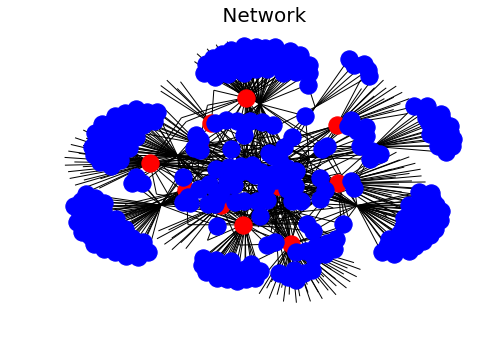

In [107]:
#visualize
nx.draw(G, nodelist = sector, node_color = 'red')
nx.draw(G, nodelist = headq, node_color = 'blue')
plt.title(' Network', fontsize = 20, color = 'black')
plt.show()

In [108]:
# top degree Sectors
gd=pd.DataFrame(G.degree(sector)).sort_values(1,ascending =False).rename({0:'1:',1:'DEGREE'}, axis=1).set_index("1:")
print("Degree: \n", gd)

Degree: 
                         DEGREE
1:                            
Industrials                 59
Health Care                 55
Information Technology      54
Consumer Discretionary      50
Financials                  41
Utilities                   27
Consumer Staples            26
Materials                   25
Real Estate                 25
Communication Services      15
Energy                      10
